# Определение выгодного тарифа для телеком компании
## **Описание проекта**

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Откроем файл с данными и изучим общую информацию

In [2]:
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


array([[<Axes: title={'center': 'duration'}>]], dtype=object)

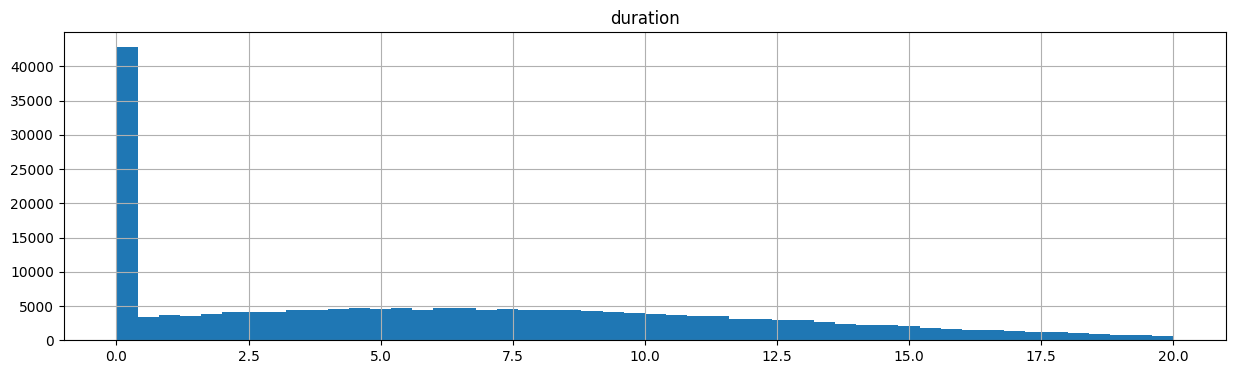

In [ ]:
calls.hist('duration', bins=50, figsize=(15,4), range=(0,20))

сохраним датафрейм в переменную `sessions`.

In [4]:
sessions = pd.read_csv('/datasets/internet.csv')

In [5]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


array([[<Axes: title={'center': 'mb_used'}>]], dtype=object)

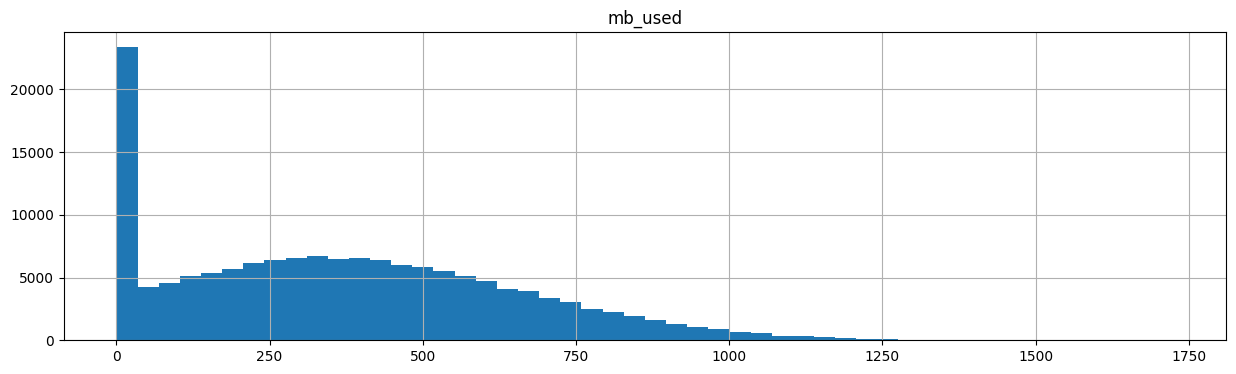

In [ ]:
sessions.hist('mb_used', bins=50, figsize=(15,4))

In [6]:
messages = pd.read_csv('/datasets//messages.csv')

In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('/datasets//tariffs.csv')

In [9]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users = pd.read_csv('/datasets//users.csv')

In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Подготовим данные

Приведем столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу с помощью метода `to_datetime()`.

In [15]:

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

В данных вы есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлим значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведем столбец `duration` к типу `int`.

In [16]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Удалим столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [17]:
sessions = sessions.drop(columns='Unnamed: 0')

Создадим столбец `month` в датафреймах.

In [18]:
calls['month'] = calls['call_date'].dt.month

In [19]:
messages['month'] = messages['message_date'].dt.month

In [20]:
sessions['month'] = sessions['session_date'].dt.month

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам.

In [21]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [22]:
calls_per_month.head(15)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраним в переменную `minutes_per_month`.

In [23]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [24]:
minutes_per_month.head(15)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную `messages_per_month`.

In [25]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [26]:
messages_per_month.head(15)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную `sessions_per_month`.

In [27]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [28]:
sessions_per_month.head(15)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25

### Анализ данных и подсчёт выручки

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [29]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [30]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [31]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [32]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [33]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [34]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф


In [35]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [36]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [37]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбец `total_cost`

In [38]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики

In [71]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std',
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.sample(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
22,12,smart,66.49,18113.66,35.99,478.56,26.80,5573.68,30.58,199.25,65.0,17713.51,29.0,471.0
12,7,smart,56.73,15743.15,33.75,408.35,24.63,5897.15,28.28,179.58,58.0,15925.29,29.0,414.0
17,9,ultra,74.60,19204.28,52.29,539.44,44.38,9486.09,46.40,325.14,74.0,19656.30,43.0,520.0
19,10,ultra,77.37,20045.34,58.43,558.08,45.54,9803.11,51.93,326.29,75.0,20338.15,49.0,533.0
16,9,smart,59.55,16303.58,33.64,428.61,25.00,5196.12,28.12,183.13,61.0,16028.44,30.0,435.0
15,8,ultra,71.29,19576.05,48.44,510.78,43.54,10476.56,46.60,312.98,73.0,18932.62,40.0,500.0
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
14,8,smart,58.98,16610.72,33.64,421.47,25.20,5593.50,28.95,186.53,62.0,16833.49,27.0,432.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
23,12,ultra,83.32,21793.17,60.61,592.81,48.21,10378.39,51.79,342.46,82.0,21972.63,51.0,584.0


Распределение среднего количества звонков по видам тарифов и месяцам

[Text(0.5, 0, 'Month Number'), Text(0, 0.5, 'Average Number of Calls')]

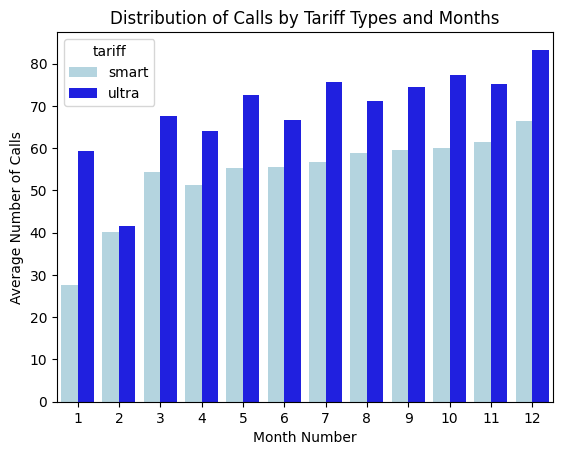

In [69]:
ax = sns.barplot(x='month',
                 y='calls_mean',
                 hue='tariff',
                 data=stats_df,
                 palette=['lightblue', 'blue'])


ax.set_title('Distribution of Calls by Tariff Types and Months')
ax.set(xlabel='Month Number', ylabel='Average Number of Calls')

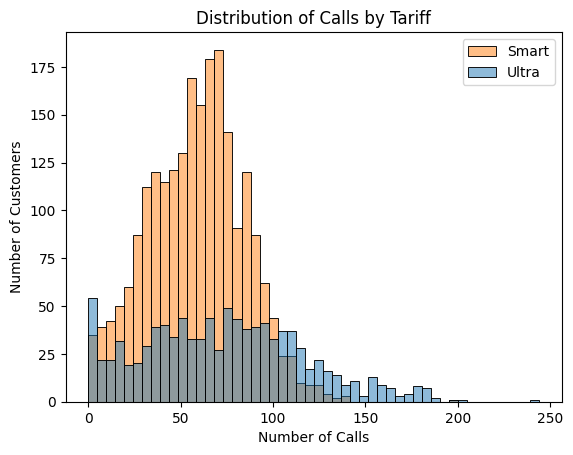

In [70]:
sns.histplot(data=user_behavior, x='calls', hue='tariff', bins=50, alpha=0.5)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of Calls')
plt.ylabel('Number of Customers')
plt.title('Distribution of Calls by Tariff')

plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

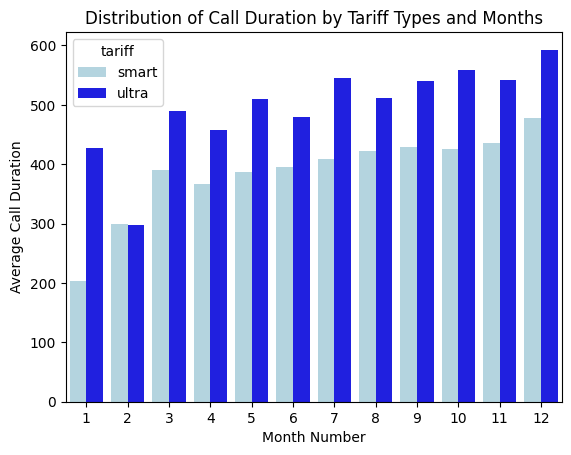

In [72]:
ax = sns.barplot(x='month',
                 y='minutes_mean',
                 hue='tariff',
                 data=stats_df,
                 palette=['lightblue', 'blue'])

ax.set_title('Distribution of Call Duration by Tariff Types and Months')
ax.set(xlabel='Month Number', ylabel='Average Call Duration')

plt.show()

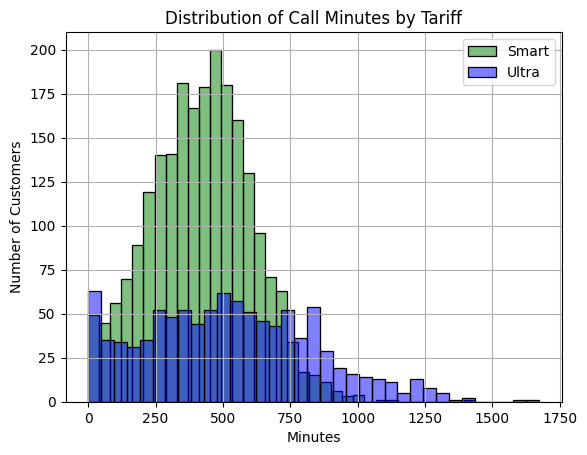

In [68]:
sns.histplot(data=user_behavior[user_behavior['tariff'] == 'smart'], x='minutes', bins=35, alpha=0.5, color='green')

sns.histplot(data=user_behavior[user_behavior['tariff'] == 'ultra'], x='minutes', bins=35, alpha=0.5, color='blue')

plt.title('Distribution of Call Minutes by Tariff')
plt.xlabel('Minutes')
plt.ylabel('Number of Customers')
plt.legend(['Smart', 'Ultra'])
plt.grid(True)
plt.show()

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

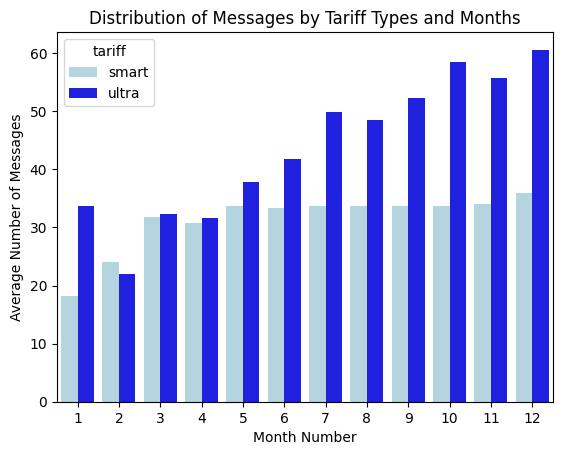

In [73]:
ax = sns.barplot(x='month',
                 y='messages_mean',
                 hue='tariff',
                 data=stats_df,
                 palette=['lightblue', 'blue']
)

ax.set_title('Distribution of Messages by Tariff Types and Months')
ax.set(xlabel='Month Number', ylabel='Average Number of Messages')

plt.show()

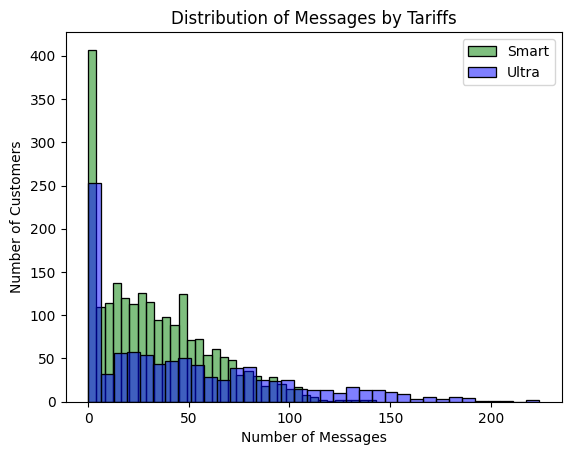

In [74]:
sns.histplot(data=user_behavior[user_behavior['tariff'] == 'smart'], x='messages', bins=35, alpha=0.5, color='green')

sns.histplot(data=user_behavior[user_behavior['tariff'] == 'ultra'], x='messages', bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of Messages')
plt.ylabel('Number of Customers')
plt.title('Distribution of Messages by Tariffs')

plt.show()

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

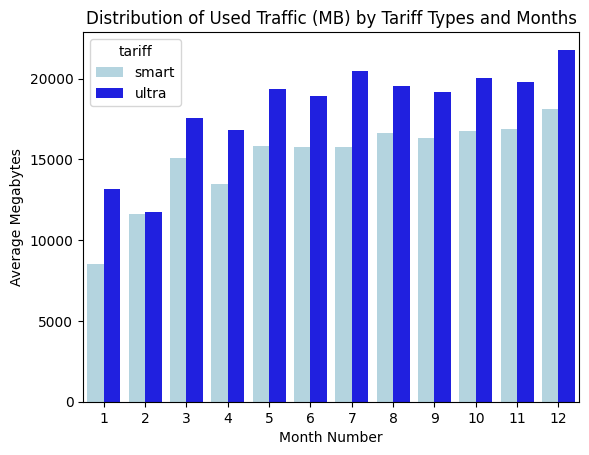

In [75]:
ax = sns.barplot(x='month',
                 y='sessions_mean',
                 hue='tariff',
                 data=stats_df,
                 palette=['lightblue', 'blue']
)

ax.set_title('Distribution of Used Traffic (MB) by Tariff Types and Months')
ax.set(xlabel='Month Number', ylabel='Average Megabytes')

plt.show()

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

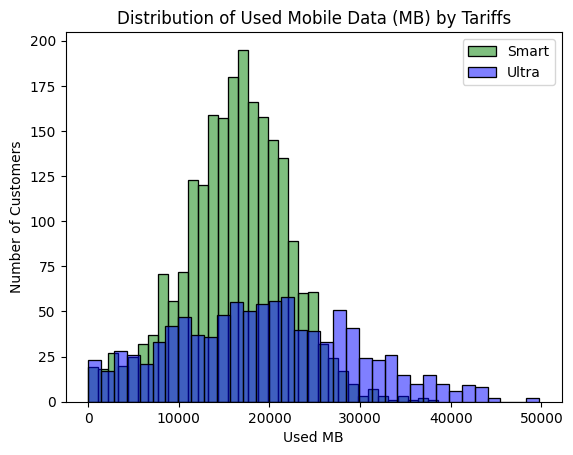

In [77]:
sns.histplot(data=user_behavior[user_behavior['tariff'] == 'smart'], x='mb_used', bins=35, alpha=0.5, color='green')

sns.histplot(data=user_behavior[user_behavior['tariff'] == 'ultra'], x='mb_used', bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Used MB')
plt.ylabel('Number of Customers')
plt.title('Distribution of Used Mobile Data (MB) by Tariffs')

plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

### Проверка гипотез

Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [48]:
from scipy import stats as st

In [55]:
total_cost_smart = user_behavior[user_behavior['tariff'] =='smart']['total_cost']
total_cost_ultra = user_behavior[user_behavior['tariff'] =='ultra']['total_cost']

Средняя выручка тарифа "smart":

In [56]:
total_cost_smart.mean()

1289.9735307312696

Средняя выручка тарифа "ultra":

In [57]:
total_cost_ultra.mean()

2070.1522842639592

In [81]:
total_cost_ultra.mean() / total_cost_smart.mean()

1.6048021412427091

посмотрим гистограмму:

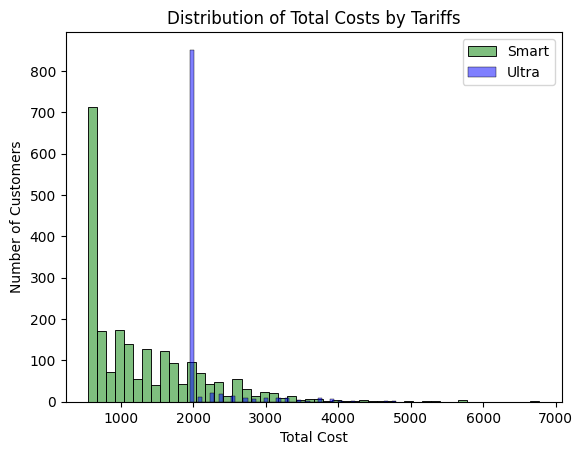

In [78]:
sns.histplot(total_cost_smart, bins=50, alpha=0.5, color='green')
sns.histplot(total_cost_ultra, bins=50, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Total Cost')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Costs by Tariffs')

plt.show()

In [60]:
results = st.ttest_ind(
    total_cost_smart,
    total_cost_ultra,
    equal_var = False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [61]:
total_cost_moskow = user_behavior[user_behavior['city'] =='Москва']['total_cost']
total_cost_other_city = user_behavior[user_behavior['city'] !='Москва']['total_cost']

In [62]:
total_cost_moskow.mean()

1546.7135842880523

In [63]:
total_cost_other_city.mean()

1524.9362274298885

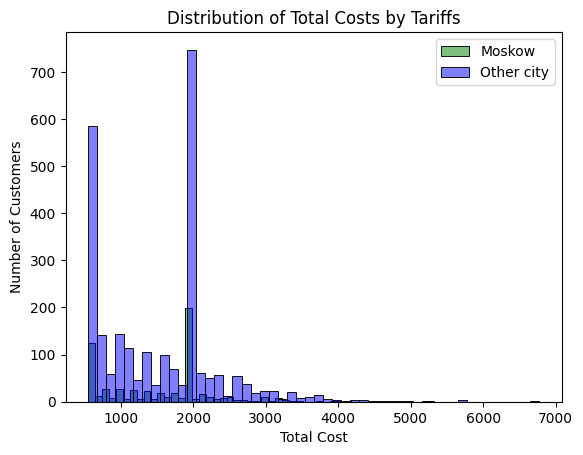

In [80]:
sns.histplot(total_cost_moskow, bins=50, alpha=0.5, color='green')
sns.histplot(total_cost_other_city, bins=50, alpha=0.5, color='blue')

plt.legend(['Moskow', 'Other city'])
plt.xlabel('Total Cost')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Costs by Tariffs')

plt.show()

In [ ]:
results = st.ttest_ind(
    user_behavior[user_behavior['city'] =='Москва']['total_cost'] ,
    user_behavior[user_behavior['city'] !='Москва']['total_cost'],
    equal_var = False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Выводы:

Изучив данные, мы выявили, что клиенты тарифа Ультра расходуют больше интернет-трафика, делают больше звонков и отправляют больше сообщений, нежели клиенты тарифа Смарт и практически не превышают лимит своего пакета, чего не скажешь о клиентах тарифа Смарт. В среднем пользователь тарифа Ультра приносит на 60% больше выручки в год чем, пользователь Смарта.  
Проверили гипотезы с помощью теста Стьюдента. Убедились, что средняя выручка тарифов Смарт и Ультра различается. Убедились, что средняя выручка клиентов с Москвы и других регионов не отличается.

